In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
import datetime
from dateutil.parser import parse

In [3]:
ua = UserAgent()

In [4]:
import os
import glob

In [5]:
dir_ = r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks"
dir_list = glob.glob(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks\*.txt")

In [6]:
li_2 = []
for i in dir_list:
    li_2.append(i.replace(dir_,"").replace(".txt","").replace("\\","").replace(".us","").upper())

In [7]:
li_2[0:10]

['A', 'AA', 'AAAP', 'AABA', 'AAC', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI']

#  이제 industry number 가져오자

In [8]:
nasdaq = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\NASDAQ.csv")
nyse = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\NYSE.csv")
amex = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\AMEX.csv")

In [9]:
nas_2 = nasdaq.loc[:,["Symbol","Sector","industry"]]
nys_2 = nyse.loc[:,["Symbol","Sector","industry"]]
amex_2 = amex.loc[:,["Symbol","Sector","industry"]]

In [10]:
indu_all = pd.concat([nas_2,nys_2,amex_2])
indu_all

,Symbol,Sector,industry
0,TXG,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,YI,Health Care,Medical/Nursing Services
2,PIH,Finance,Property-Casualty Insurers
3,PIHPP,Finance,Property-Casualty Insurers
4,TURN,Finance,Finance/Investors Services
...,...,...,...
290,WYY,Technology,EDP Services
291,WTT,Capital Goods,Electrical Products
292,XTNT,Health Care,Biotechnology: Biological Products (No Diagnos...
293,ZDGE,Technology,Computer Software: Prepackaged Software


In [11]:
indu_all[indu_all["Symbol"]=="A"]["industry"].reset_index(drop=True)[0]

'Biotechnology: Laboratory Analytical Instruments'

In [12]:
dic_ = {}
for i in tqdm(li_2):
    try:
        indu_ = indu_all[indu_all["Symbol"]==i]["industry"].reset_index(drop=True)[0]
        sec_ = indu_all[indu_all["Symbol"]==i]["Sector"].reset_index(drop=True)[0]
        list_ = [indu_,sec_]
        dic_[i] = list_
    except:
        pass

100%|█████████████████████████████████████████████████████████████████████████████| 7195/7195 [00:10<00:00, 680.21it/s]


In [13]:
len(dic_)

4683

In [14]:
dic_

{'A': ['Biotechnology: Laboratory Analytical Instruments', 'Capital Goods'],
 'AA': ['Aluminum', 'Basic Industries'],
 'AAL': ['Air Freight/Delivery Services', 'Transportation'],
 'AAMC': ['Real Estate', 'Finance'],
 'AAME': ['Life Insurance', 'Finance'],
 'AAN': ['Diversified Commercial Services', 'Technology'],
 'AAOI': ['Semiconductors', 'Technology'],
 'AAON': ['Industrial Machinery/Components', 'Capital Goods'],
 'AAP': ['Other Specialty Stores', 'Consumer Services'],
 'AAPL': ['Computer Manufacturing', 'Technology'],
 'AAT': ['Real Estate Investment Trusts', 'Consumer Services'],
 'AAU': ['Precious Metals', 'Basic Industries'],
 'AAWW': ['Transportation Services', 'Transportation'],
 'AAXN': ['Ordnance And Accessories', 'Capital Goods'],
 'AB': ['Investment Managers', 'Finance'],
 'ABB': ['Electrical Products', 'Consumer Durables'],
 'ABBV': ['Major Pharmaceuticals', 'Health Care'],
 'ABC': ['Other Pharmaceuticals', 'Health Care'],
 'ABCB': ['Major Banks', 'Finance'],
 'ABEO': ['

In [15]:
indexs = []
indus = []
sector = []
for key,value in dic_.items():
    indexs.append(key.lower())
    indus.append(value[0])
    sector.append(value[1])

In [16]:
indu_df = pd.DataFrame(data=[indus,sector,indexs]).T
indu_df.head()

,0,1,2
0,Biotechnology: Laboratory Analytical Instruments,Capital Goods,a
1,Aluminum,Basic Industries,aa
2,Air Freight/Delivery Services,Transportation,aal
3,Real Estate,Finance,aamc
4,Life Insurance,Finance,aame


In [17]:
sample = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks\a.us.txt")
sample["Date"] = pd.to_datetime(sample["Date"].map(lambda x: parse(x).strftime("%Y")))
#sample = sample.set_index("Date")

In [18]:
sample["Date"].value_counts()

2008-01-01    253
2016-01-01    252
2003-01-01    252
2013-01-01    252
2014-01-01    252
2009-01-01    252
2015-01-01    252
2010-01-01    252
2005-01-01    252
2004-01-01    252
2011-01-01    252
2006-01-01    251
2007-01-01    251
2000-01-01    251
2012-01-01    250
2002-01-01    249
2001-01-01    248
2017-01-01    218
1999-01-01     30
Name: Date, dtype: int64

In [19]:
date_list=list(sample["Date"].value_counts().keys())

In [20]:
sample[sample["Date"]=="1999"]

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-01-01,30.713,33.754,27.002,29.702,66277506,0
1,1999-01-01,28.986,29.027,26.872,27.257,16142920,0
2,1999-01-01,27.886,29.702,27.044,29.702,6970266,0
3,1999-01-01,28.688,29.446,27.002,27.002,6332082,0
4,1999-01-01,27.083,28.309,27.002,27.717,5132147,0
5,1999-01-01,27.594,28.012,27.509,27.807,1832635,0
6,1999-01-01,27.676,28.650,27.380,28.432,4317826,0
7,1999-01-01,28.350,28.986,27.634,28.480,4567146,0
8,1999-01-01,28.480,29.324,28.273,28.986,3133746,0
9,1999-01-01,29.532,30.375,29.155,29.786,3252997,0


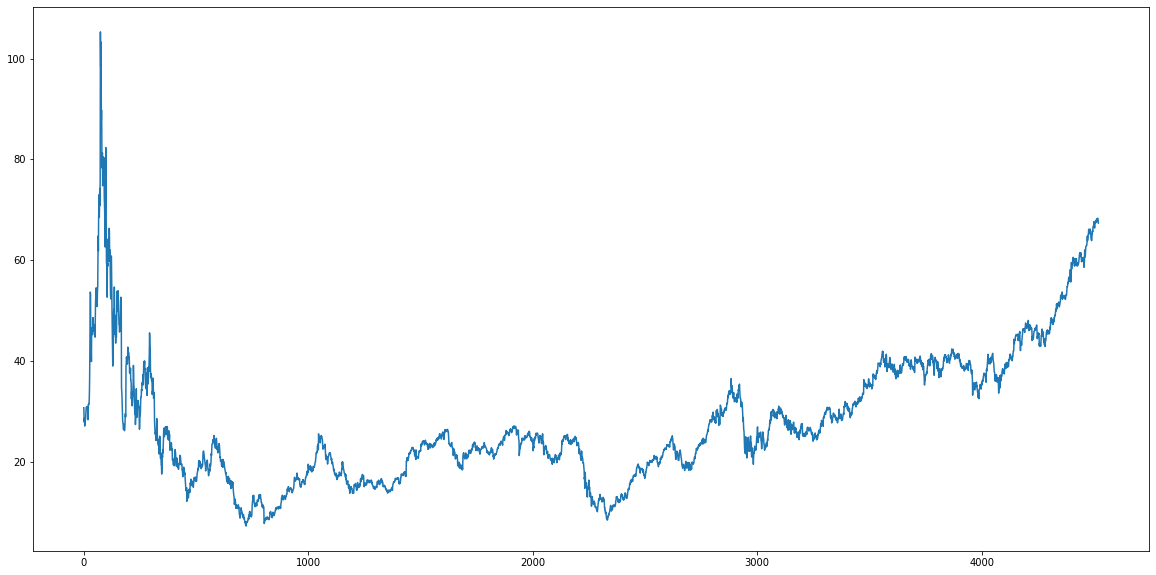

In [21]:
sample["Open"].plot(figsize = (20,10))
plt.savefig(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\img\{}.us.png".format("a"))
plt.show()

In [22]:
plt.savefig(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\img\{}.us.png".format("a"))

<Figure size 432x288 with 0 Axes>

# 하나 기업 여러개로 나누자


## x값

1. 기간전체

2. 년별

## y값
1. open 말고 다른것

2. volume
## class 

1. indu

2. sector

## 1. 기간전체  & sector

In [23]:
indu_df.head()

,0,1,2
0,Biotechnology: Laboratory Analytical Instruments,Capital Goods,a
1,Aluminum,Basic Industries,aa
2,Air Freight/Delivery Services,Transportation,aal
3,Real Estate,Finance,aamc
4,Life Insurance,Finance,aame


In [24]:
def make_graph_open_all(Co,indu_df):
    code = Co
    sector = indu_df[indu_df[2]==code][1].reset_index()[1][0]
    df = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks\{}.us.txt".format(code))
    df["Date"] = pd.to_datetime(df["Date"].map(lambda x: parse(x).strftime("%Y")))
    df["Open"].plot(figsize = (20,10))
    plt.savefig(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\img\open_all\{}_{}.png".format(sector,code))
    plt.close("all")

In [ ]:
for c in tqdm(indu_df[2]):
    try:
        make_graph_open_all(c,indu_df)
    except:
        print(c)

  1%|▌                                                                               | 34/4683 [00:09<18:38,  4.16it/s]

accp


  5%|███▋                                                                           | 217/4683 [00:50<12:17,  6.06it/s]

amrh
amrhw


  9%|███████▍                                                                       | 441/4683 [01:44<19:41,  3.59it/s]

bbrx


 12%|█████████▊                                                                     | 584/4683 [02:20<12:49,  5.33it/s]

boxl


 14%|███████████                                                                    | 655/4683 [02:36<14:01,  4.79it/s]

bxg


 29%|██████████████████████▌                                                       | 1357/4683 [05:19<12:14,  4.53it/s]

ehr


 35%|███████████████████████████▏                                                  | 1631/4683 [06:27<11:47,  4.32it/s]

fmax


 50%|███████████████████████████████████████                                       | 2344/4683 [09:17<06:57,  5.61it/s]

jt


 69%|█████████████████████████████████████████████████████▋                        | 3221/4683 [16:23<12:23,  1.97it/s]

otg


 70%|██████████████████████████████████████████████████████▍                       | 3267/4683 [16:45<15:54,  1.48it/s]

pbio


 79%|█████████████████████████████████████████████████████████████▉                | 3716/4683 [21:09<07:36,  2.12it/s]

sail


 80%|██████████████████████████████████████████████████████████████▍               | 3747/4683 [21:25<08:43,  1.79it/s]

sbt


 80%|██████████████████████████████████████████████████████████████▍               | 3751/4683 [21:26<06:26,  2.41it/s]

scci


 80%|██████████████████████████████████████████████████████████████▋               | 3762/4683 [21:32<07:59,  1.92it/s]

scph


 81%|███████████████████████████████████████████████████████████████▏              | 3793/4683 [21:48<07:36,  1.95it/s]

sfix


 85%|██████████████████████████████████████████████████████████████████▏           | 3971/4683 [23:18<05:46,  2.05it/s]

srva


 94%|█████████████████████████████████████████████████████████████████████████▍    | 4410/4683 [27:42<02:00,  2.27it/s]